In [1]:
#import relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline

In [2]:
#obtain the data and merge it to a single dataframe
import glob
import os

path=r'D://chris/data_sets/sales_2019'
all_files=glob.glob(os.path.join(path, "*.csv"))

df=pd.concat((pd.read_csv(file) for file in all_files), ignore_index=False)

In [3]:
#view top five rows
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [4]:
#view number of rows and columns
df.shape

(186850, 6)

In [5]:
#brief description of columns
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 186850 entries, 0 to 11685
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 10.0+ MB


Quantity ordered and Price Each should be numeric

Order date should be datetime

Purchase Address contains Street, City, State and Zip-code data

There are null values in the dataset

In [6]:
#remove null values
df.dropna(axis=0, inplace=True)

In [7]:
#check if any of the columns has a null value
df.isnull().any()

Order ID            False
Product             False
Quantity Ordered    False
Price Each          False
Order Date          False
Purchase Address    False
dtype: bool

In [8]:
#Check if there are duplicate records
df.duplicated().any()

True

In [9]:
#remove the duplicate records
df.drop_duplicates(inplace=True)

In [10]:
#check if there are any remaining duplicate records
df.duplicated().any()

False

In [11]:
#obtain summary statistics for all columns
df.describe()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
count,185687,185687,185687,185687,185687,185687
unique,178438,20,10,24,142396,140788
top,160873,USB-C Charging Cable,1,11.95,12/15/19 20:16,"193 Forest St, San Francisco, CA 94016"
freq,5,21859,168291,21859,8,9


Customer with Order ID 160873 bought most products at once

USB-C Charging cable was most bought product

Quantity ordered for an item is mostly one

In [12]:
#what are the unique values for quantity ordered
df['Quantity Ordered'].unique()

array(['2', '1', '3', '5', 'Quantity Ordered', '4', '7', '6', '8', '9'],
      dtype=object)

There is an incorrect value for Quantity Ordered

In [13]:
#records with an incorrect value for quantity ordered
df[df['Quantity Ordered']=='Quantity Ordered']

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
519,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


There is only one record with incorrect value and the record contains header values only

In [14]:
#remove the records above
df=df[df['Order ID'] != 'Order ID']

In [15]:
#convert Quantity Ordered column to an integer type
df['Quantity Ordered']=df['Quantity Ordered'].astype('int64')

In [16]:
#convert the Price Each column to a float type
df['Price Each']=df['Price Each'].astype('float64')

In [17]:
#get date and time portions from Order Date column
seriesOfDateLists=df['Order Date'].apply(lambda x: x.strip().split(' '))
df['Date only']=seriesOfDateLists.apply(lambda x: x[0])
df['Time']=seriesOfDateLists.apply(lambda x: x[1])

In [18]:
#convert Time column to datetime type
df['Time']=pd.to_datetime(df['Time'], format='%H:%M')

In [19]:
#view structure of Date only column
df['Date only']

0        04/19/19
2        04/07/19
3        04/12/19
4        04/12/19
5        04/30/19
           ...   
11681    09/17/19
11682    09/01/19
11683    09/23/19
11684    09/19/19
11685    09/30/19
Name: Date only, Length: 185686, dtype: object

In [20]:
#convert Date only column to datetime type
df['Date only']=pd.to_datetime(df['Date only'], format='%m/%d/%y')

In [21]:
#view structure of Purchase Address column
df['Purchase Address']

0                   917 1st St, Dallas, TX 75001
2              682 Chestnut St, Boston, MA 02215
3           669 Spruce St, Los Angeles, CA 90001
4           669 Spruce St, Los Angeles, CA 90001
5              333 8th St, Los Angeles, CA 90001
                          ...                   
11681     840 Highland St, Los Angeles, CA 90001
11682    216 Dogwood St, San Francisco, CA 94016
11683       220 12th St, San Francisco, CA 94016
11684     511 Forest St, San Francisco, CA 94016
11685     250 Meadow St, San Francisco, CA 94016
Name: Purchase Address, Length: 185686, dtype: object

In [22]:
#separate Purchase Address column into street and City columns
seriesOfAddressLists=df['Purchase Address'].apply(lambda x: x.split(','))
df['Street']=seriesOfAddressLists.apply(lambda x: x[0])
df['City']=seriesOfAddressLists.apply(lambda x: x[1])

In [23]:
#Separate Purchase Address column into State and Zipcode columns
seriesOfStateAndZipcodeLists=seriesOfAddressLists.apply(lambda x: x[2]).apply(lambda x: x.strip().split(' '))
df['State']=seriesOfStateAndZipcodeLists.apply(lambda x: x[0])
df['Zip Code']=seriesOfStateAndZipcodeLists.apply(lambda x: x[1])

In [24]:
#view changes made to dataframe
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Date only,Time,Street,City,State,Zip Code
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",2019-04-19,1900-01-01 08:46:00,917 1st St,Dallas,TX,75001
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",2019-04-07,1900-01-01 22:30:00,682 Chestnut St,Boston,MA,02215
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",2019-04-12,1900-01-01 14:38:00,669 Spruce St,Los Angeles,CA,90001
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",2019-04-12,1900-01-01 14:38:00,669 Spruce St,Los Angeles,CA,90001
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",2019-04-30,1900-01-01 09:27:00,333 8th St,Los Angeles,CA,90001


In [25]:
#standardize text columns by converting to upper case
text_columns=['State','City','Street','Purchase Address','Product']
for column in text_columns:
    df[column]=df[column].apply(lambda x: x.upper())

In [26]:
#check changes made
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Date only,Time,Street,City,State,Zip Code
0,176558,USB-C CHARGING CABLE,2,11.95,04/19/19 08:46,"917 1ST ST, DALLAS, TX 75001",2019-04-19,1900-01-01 08:46:00,917 1ST ST,DALLAS,TX,75001
2,176559,BOSE SOUNDSPORT HEADPHONES,1,99.99,04/07/19 22:30,"682 CHESTNUT ST, BOSTON, MA 02215",2019-04-07,1900-01-01 22:30:00,682 CHESTNUT ST,BOSTON,MA,02215
3,176560,GOOGLE PHONE,1,600.00,04/12/19 14:38,"669 SPRUCE ST, LOS ANGELES, CA 90001",2019-04-12,1900-01-01 14:38:00,669 SPRUCE ST,LOS ANGELES,CA,90001
4,176560,WIRED HEADPHONES,1,11.99,04/12/19 14:38,"669 SPRUCE ST, LOS ANGELES, CA 90001",2019-04-12,1900-01-01 14:38:00,669 SPRUCE ST,LOS ANGELES,CA,90001
5,176561,WIRED HEADPHONES,1,11.99,04/30/19 09:27,"333 8TH ST, LOS ANGELES, CA 90001",2019-04-30,1900-01-01 09:27:00,333 8TH ST,LOS ANGELES,CA,90001


In [27]:
#summary statistics for numerical columns
df.describe()

,Quantity Ordered,Price Each
count,185686.000000,185686.000000
mean,1.124544,184.519255
std,0.443069,332.843838
min,1.000000,2.990000
25%,1.000000,11.950000
50%,1.000000,14.950000
75%,1.000000,150.000000
max,9.000000,1700.000000


Maximum quantity ordered for an item is 9

Mean quantity ordered for an item is 1.12

Average price of items odered is $184.519

Most expensive item ordered costed $1700

75% of all items orderd costed $150 or less

Least expensive item ordered costed $2.99

In [28]:
#summary statistics for string columns
df.describe(include=['object'])

,Order ID,Product,Order Date,Purchase Address,Street,City,State,Zip Code
count,185686,185686,185686,185686,185686,185686,185686,185686
unique,178437,19,142395,140787,46837,9,8,10
top,160873,USB-C CHARGING CABLE,12/15/19 20:16,"193 FOREST ST, SAN FRANCISCO, CA 94016",732 HIGHLAND ST,SAN FRANCISCO,CA,94016
freq,5,21859,8,9,14,44662,74226,44662


Most orders come from state of California in City of San Francisco

In [29]:
#states and Cities from which orders originated
df[['State','City']].drop_duplicates().sort_values(by='State')

,State,City
3,CA,LOS ANGELES
6,CA,SAN FRANCISCO
8,GA,ATLANTA
2,MA,BOSTON
224,ME,PORTLAND
16,NY,NEW YORK CITY
28,OR,PORTLAND
0,TX,DALLAS
38,TX,AUSTIN
7,WA,SEATTLE


In [30]:
#summary statistics for datetime columns
df.describe(include=['datetime'], datetime_is_numeric=True)

,Date only,Time
count,185686,185686
mean,2019-07-18 06:37:50.904645632,1900-01-01 14:54:15.393406464
min,2019-01-01 00:00:00,1900-01-01 00:00:00
25%,2019-04-16 00:00:00,1900-01-01 11:17:00
50%,2019-07-17 00:00:00,1900-01-01 15:11:00
75%,2019-10-26 00:00:00,1900-01-01 19:21:00
max,2020-01-01 00:00:00,1900-01-01 23:59:00


Time range for orders is from 00:00hrs to 23:59hrs

Data is collected for 2019-01-01 to 2020-01-01

75% of orders occured at or before 19:21hrs

In [31]:
#New column for sales from single order item
df['Sales']=df['Quantity Ordered']*df['Price Each']

In [33]:
#split Time column into categories
labels=['12-4am','<8am','<12pm','<4pm','<8pm','<12am']
bins=[]
time_list=['1900-01-01 00:00:00','1900-01-01 04:00:00','1900-01-01 08:00:00','1900-01-01 12:00:00',
 '1900-01-01 16:00:00','1900-01-01 20:00:00','1900-01-01 23:59:00']
for time in time_list:
    bins.append(pd.Timestamp(time))
df['Time Category']=pd.cut(df['Time'], bins=bins, labels=labels, include_lowest=True)

In [34]:
#view top five rows
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Date only,Time,Street,City,State,Zip Code,Sales,Time Category
0,176558,USB-C CHARGING CABLE,2,11.95,04/19/19 08:46,"917 1ST ST, DALLAS, TX 75001",2019-04-19,1900-01-01 08:46:00,917 1ST ST,DALLAS,TX,75001,23.90,<12pm
2,176559,BOSE SOUNDSPORT HEADPHONES,1,99.99,04/07/19 22:30,"682 CHESTNUT ST, BOSTON, MA 02215",2019-04-07,1900-01-01 22:30:00,682 CHESTNUT ST,BOSTON,MA,02215,99.99,<12am
3,176560,GOOGLE PHONE,1,600.00,04/12/19 14:38,"669 SPRUCE ST, LOS ANGELES, CA 90001",2019-04-12,1900-01-01 14:38:00,669 SPRUCE ST,LOS ANGELES,CA,90001,600.00,<4pm
4,176560,WIRED HEADPHONES,1,11.99,04/12/19 14:38,"669 SPRUCE ST, LOS ANGELES, CA 90001",2019-04-12,1900-01-01 14:38:00,669 SPRUCE ST,LOS ANGELES,CA,90001,11.99,<4pm
5,176561,WIRED HEADPHONES,1,11.99,04/30/19 09:27,"333 8TH ST, LOS ANGELES, CA 90001",2019-04-30,1900-01-01 09:27:00,333 8TH ST,LOS ANGELES,CA,90001,11.99,<12pm


In [36]:
#obtain records with unique order id
uniqueOrders=df.drop_duplicates(subset=['Order ID'])

In [37]:
#group unique order Ids by time category
groupOrdersByTime=uniqueOrders.groupby(uniqueOrders['Time Category'])['Order ID'].count()
groupOrdersByTime.sort_values(ascending=False)

Time Category
<8pm      44614
<4pm      44012
<12pm     36934
<12am     36500
<8am       8352
12-4am     8025
Name: Order ID, dtype: int64

Text(0, 0.5, 'Total number of Orders')

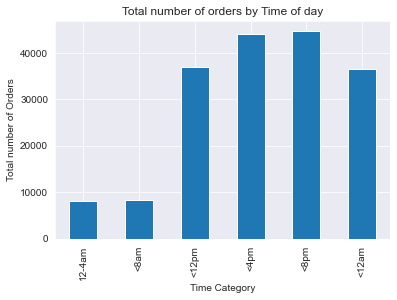

In [38]:
#plot the grouping
groupOrdersByTime.plot(kind='bar', title='Total number of orders by Time of day')
plt.ylabel('Total number of Orders')

Most orders are received between 8am and midnight

Orders hit peak between 12pm and 8pm

In [39]:
#create column with year and month only
df['Year_Month']=df['Date only'].dt.to_period('M')

In [40]:
#group Total Sales by Month and Year
groupTotalSalesByMonth=df.groupby(df['Year_Month'])['Sales'].sum()
groupTotalSalesByMonth.sort_values(ascending=False)

Year_Month
2019-12    4608295.70
2019-10    3734777.86
2019-04    3389217.98
2019-11    3197875.05
2019-05    3150616.23
2019-03    2804973.35
2019-07    2646461.32
2019-06    2576280.15
2019-08    2241083.37
2019-02    2200078.08
2019-09    2094465.69
2019-01    1812742.87
2020-01       8670.29
Freq: M, Name: Sales, dtype: float64

Text(0, 0.5, 'Total Sales')

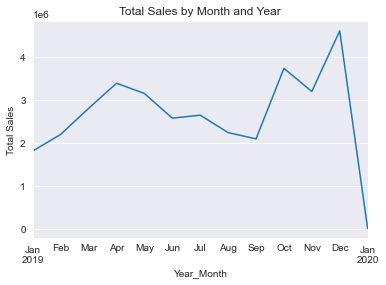

In [41]:
#Plot the grouping
groupTotalSalesByMonth.plot(kind='line', title='Total Sales by Month and Year')
plt.ylabel('Total Sales')

Sales peaked in December

In January, 2020 the Sales rapidly declined

Between January 2019 and April, there was gradual increase in sales

Beyond April, Sales declined till October, when they shot up again

In November Sales again went down

In [42]:
#Which products received the most orders
groupProductsByOrders=df.groupby(df['Product'])['Order ID'].count()
groupProductsByOrders.sort_values(ascending=False)

Product
USB-C CHARGING CABLE          21859
LIGHTNING CHARGING CABLE      21610
AAA BATTERIES (4-PACK)        20612
AA BATTERIES (4-PACK)         20558
WIRED HEADPHONES              18849
APPLE AIRPODS HEADPHONES      15525
BOSE SOUNDSPORT HEADPHONES    13298
27IN FHD MONITOR               7498
IPHONE                         6840
27IN 4K GAMING MONITOR         6225
34IN ULTRAWIDE MONITOR         6174
GOOGLE PHONE                   5522
FLATSCREEN TV                  4794
MACBOOK PRO LAPTOP             4721
THINKPAD LAPTOP                4126
20IN MONITOR                   4098
VAREEBADD PHONE                2065
LG WASHING MACHINE              666
LG DRYER                        646
Name: Order ID, dtype: int64

Text(0.5, 0, 'Total number of Orders')

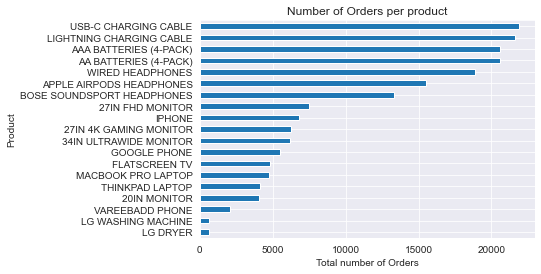

In [43]:
#visualize the above results
groupProductsByOrders.sort_values().plot(kind='barh', title='Number of Orders per product')
plt.ylabel('Product')
plt.xlabel('Total number of Orders')

In [44]:
#which products are ordered together most
orderIdDuplicates=df[df.duplicated(subset=['Order ID'], keep=False)]


In [45]:
#read latitude and longitude data in excel file into dataframe
df2=pd.read_excel('us-lat-lon.xlsx')

In [46]:
#view top five rows in the dataframe
df2.head()

,state,latitude,longitude
0,AK,63.588753,-154.493062
1,AL,32.318231,-86.902298
2,AR,35.201050,-91.831833
3,AZ,34.048928,-111.093731
4,CA,36.778261,-119.417932


In [47]:
#merge dataframes df and df2
df=pd.merge(left=df, right=df2, left_on='State', right_on='state').drop('state', axis=1)

In [48]:
#top five rows in merged dataframe
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Date only,Time,Street,City,State,Zip Code,Sales,Time Category,Year_Month,latitude,longitude
0,176558,USB-C CHARGING CABLE,2,11.95,04/19/19 08:46,"917 1ST ST, DALLAS, TX 75001",2019-04-19,1900-01-01 08:46:00,917 1ST ST,DALLAS,TX,75001,23.90,<12pm,2019-04,31.968599,-99.901813
1,176569,27IN 4K GAMING MONITOR,1,389.99,04/16/19 19:23,"657 HILL ST, DALLAS, TX 75001",2019-04-16,1900-01-01 19:23:00,657 HILL ST,DALLAS,TX,75001,389.99,<8pm,2019-04,31.968599,-99.901813
2,176570,AA BATTERIES (4-PACK),1,3.84,04/22/19 15:09,"186 12TH ST, DALLAS, TX 75001",2019-04-22,1900-01-01 15:09:00,186 12TH ST,DALLAS,TX,75001,3.84,<4pm,2019-04,31.968599,-99.901813
3,176577,APPLE AIRPODS HEADPHONES,1,150.00,04/04/19 19:25,"260 SPRUCE ST, DALLAS, TX 75001",2019-04-04,1900-01-01 19:25:00,260 SPRUCE ST,DALLAS,TX,75001,150.00,<8pm,2019-04,31.968599,-99.901813
4,176591,APPLE AIRPODS HEADPHONES,1,150.00,04/21/19 07:21,"600 MAPLE ST, AUSTIN, TX 73301",2019-04-21,1900-01-01 07:21:00,600 MAPLE ST,AUSTIN,TX,73301,150.00,<8am,2019-04,31.968599,-99.901813


In [49]:
#group total sales by State
groupStatesByTotalSales=df.groupby(df['State']).agg(Total_Sales=('Sales','sum'))
groupStatesByTotalSales.reset_index(inplace=True)
groupStatesByTotalSales.sort_values(by='Total_Sales', ascending=False)

,State,Total_Sales
0,CA,13703047.83
4,NY,4661867.14
6,TX,4583418.29
2,MA,3658627.65
1,GA,2794199.07
7,WA,2745046.02
5,OR,1870010.56
3,ME,449321.38


In [50]:
#Visualize Total Sales across States on a map
import folium
df_map=folium.Map(location=[df.latitude.mean(),df.longitude.mean()], zoom_start=4)
state_geo=f'us-states-geojson.json'
folium.Choropleth(geo_data=state_geo,
                  name='choropleth',
                  data=groupStatesByTotalSales,
                  columns=['State','Total_Sales'],
                  key_on="feature.id",
                  fill_color="YlGn",
                  fill_opacity=0.7,
                  line_opacity=0.1,
                  legend_name='Total Sales by State').add_to(df_map)
df_map